## Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Создадим связь с базой данных

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Сделаем запрос к базе данных

In [3]:
query="""
SELECT uid,
    CAST(strftime('%w', timestamp) AS integer) AS weekday,
    CAST(strftime('%H', timestamp) AS integer) AS hour
FROM checker
WHERE uid LIKE 'user_%';
"""

df = pd.read_sql(query, conn)
df['weekday'] = df['weekday'].replace({0: 7})
df

,uid,weekday,hour
0,user_4,5,5
1,user_4,5,5
2,user_4,5,5
3,user_4,5,5
4,user_4,5,5
...,...,...,...
3202,user_1,4,20
3203,user_1,4,20
3204,user_1,4,20
3205,user_1,4,20


## Создадим датафрейм для первого графика с днями недели

In [4]:
users = df.groupby(['uid']).size().sort_values(ascending=False).index # Отсортируем по users
df_weekday = df.groupby(['weekday', 'uid']).size().unstack(fill_value=0).reindex(columns=users)
df_weekday

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
1,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
2,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
3,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
4,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
5,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
6,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
7,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


### Заменим дни недели на буквенную запись

In [5]:
df_weekday.index = df_weekday.index.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'})
df_weekday

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


## Создадим датафрейм для второго графика с часами

In [6]:
users = df.groupby(['uid']).size().sort_values(ascending=False).index # Отсортируем по users
df_hours = df.groupby(['hour', 'uid']).size().unstack(fill_value=0).reindex(columns=users)
all_hours = pd.Index(range(24), name='hour')
df_hours = df_hours.reindex(all_hours)
df_hours = df_hours.fillna(0)
df_hours

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Теперь создадим тепловую карту

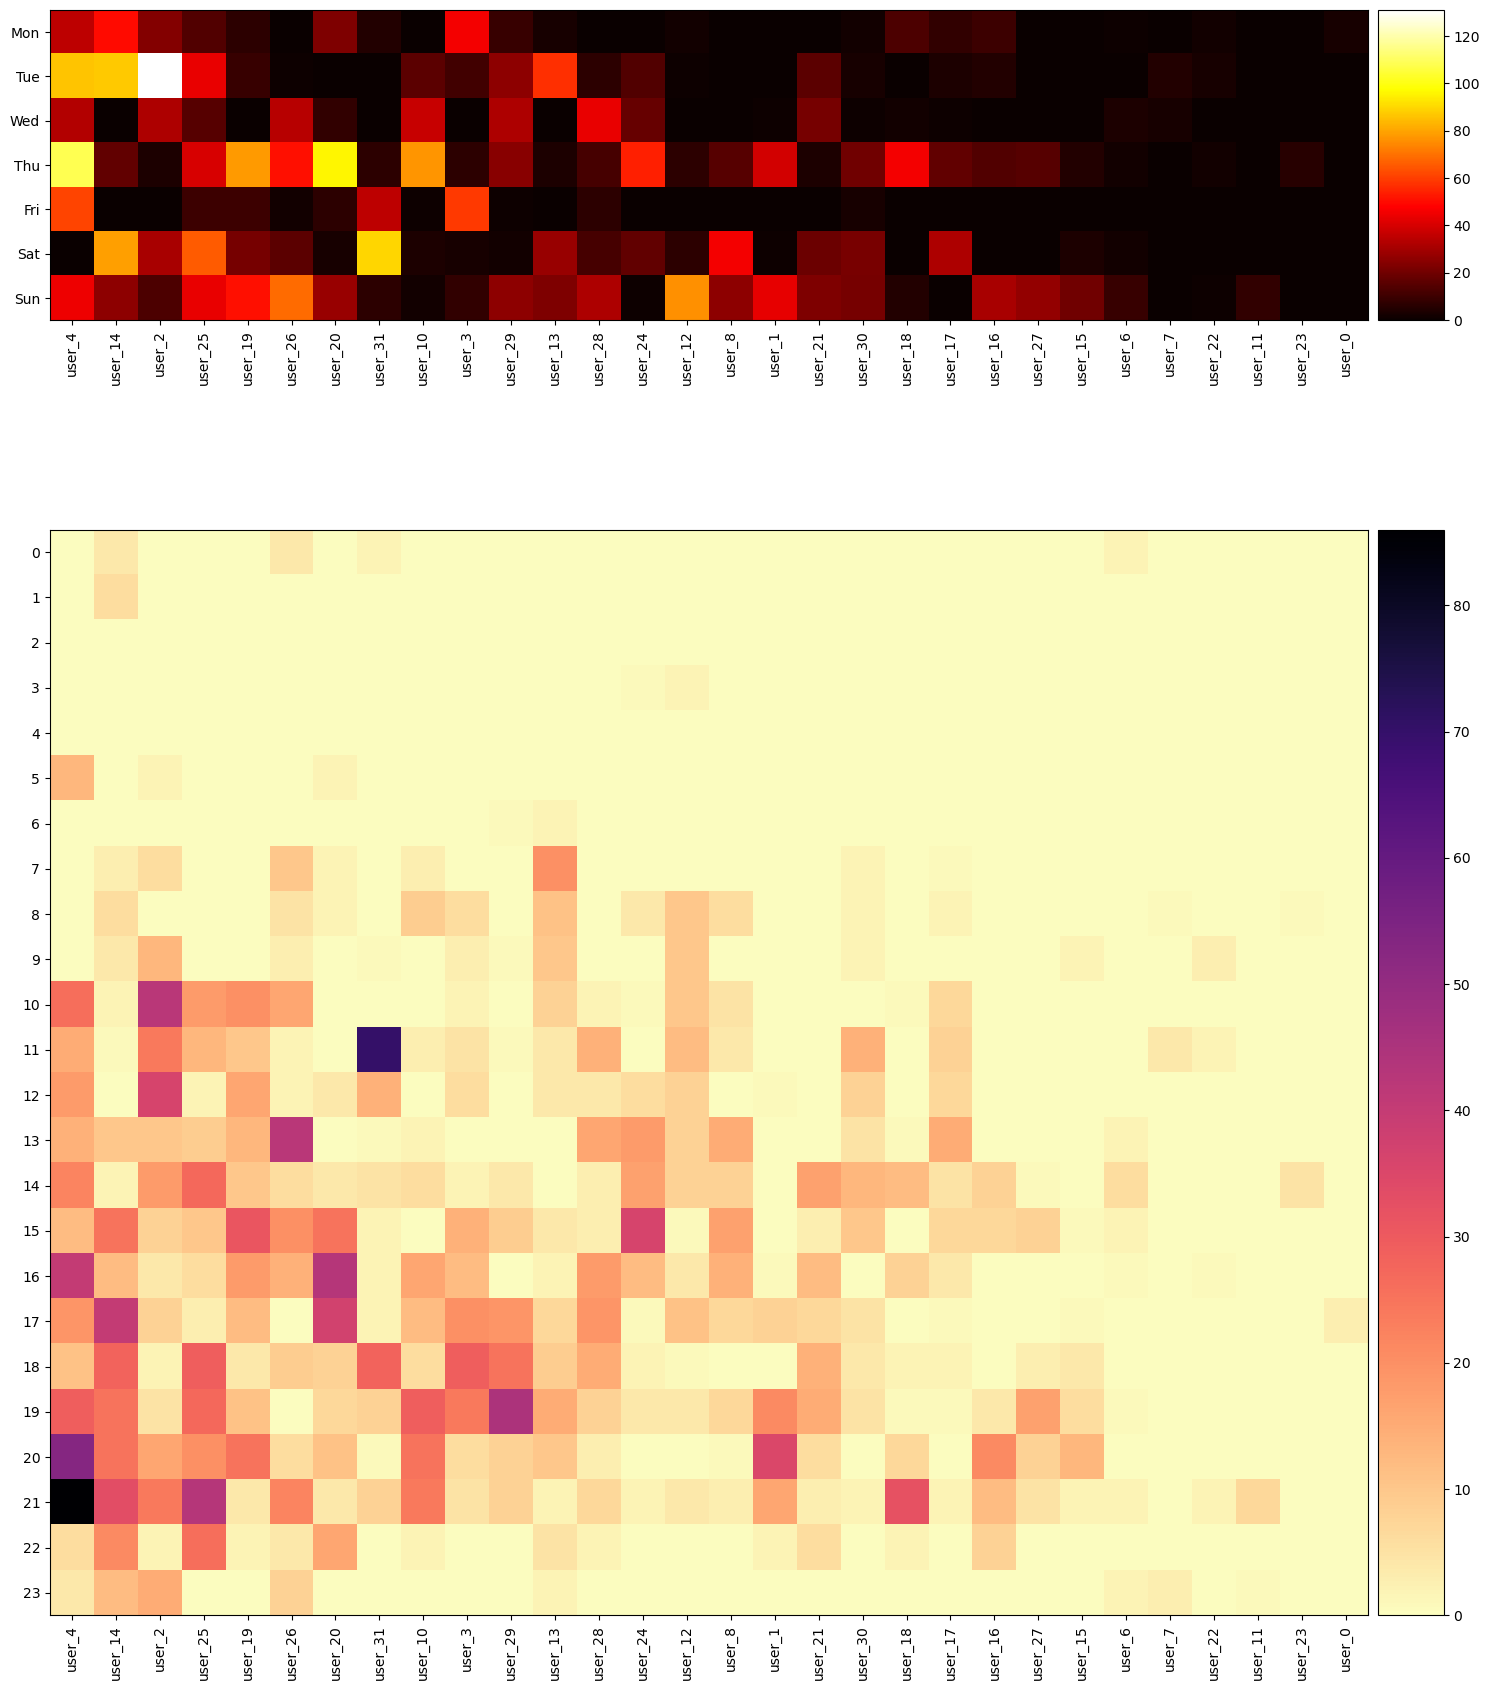

In [26]:
# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 17), gridspec_kw={'height_ratios': [1, 3.5]})

# Первая тепловая карта
im1 = ax1.imshow(df_weekday, cmap='hot', aspect='auto')
ax1.set_xticks(range(len(df_weekday.columns))) # Метки на оси X
ax1.set_xticklabels(df_weekday.columns, rotation=90)
ax1.set_yticks(range(len(df_weekday.index))) # Метки на оси Y
ax1.set_yticklabels(df_weekday.index)

# Цветовая шкала для первой тепловой карты
divider1 = make_axes_locatable(ax1) # Cоздает пространство для colorbar рядом с тепловой картой
cax1 = divider1.append_axes("right", size="5%", pad=0.1) # Ось для colorbar с правой стороны
fig.colorbar(im1, cax=cax1)

# Вторая тепловая карта
im2 = ax2.imshow(df_hours, cmap='magma_r', aspect='auto')
ax2.set_xticks(range(len(df_hours.columns)))
ax2.set_xticklabels(df_hours.columns, rotation=90)
ax2.set_yticks(range(len(df_hours.index)))
ax2.set_yticklabels(df_hours.index)

# Цветовая шкала для второй тепловой карты
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im2, cax=cax2)

# Настройки общего вида
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

## Закроем связь с базой данных

In [27]:
conn.close()

## Подведем итоги

- ### Какой пользователь сделал больше всего коммитов во вторник?
**Ответ:** user_2

- ### Какой пользователь сделал больше всего коммитов в четверг?
**Ответ:** user_4

- ### В какой день недели пользователи не делают много коммитов?
**Ответ:** Fri

- ### Какой пользователь в какое время сделал наибольшее количество коммитов?
**Ответ:** user_4, 21